# Malaria Cell Classification using Convolutional Neural Networks (CNN)

## Project Description

The goal of this project is to build and train a Convolutional Neural Network (CNN) to classify red blood cell images as either **Parasitized** (malaria-infected) or **Uninfected**. 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Forcing CPU-only execution 
tf.config.set_visible_devices([], 'GPU')


In [3]:
# Dataset
base_dir = r"C:\Users\imana\Documents\JN\cell_images"

# Verifying the contents 
folders = os.listdir(base_dir)
print("Dataset folders found:", folders)


Dataset folders found: ['Parasitized', 'Uninfected']


## Data Preprocessing & Augmentation

We rescale image pixel values to [0, 1] using the Keras `ImageDataGenerator`.
The dataset is divided into two parts: training (80%) and validation (20%).

To improve data diversity and lessen overfitting, we additionally use data augmentation parameters (rotation, shifting, etc.).


In [4]:
# Setting the image dimensions and batch size
IMAGE_HEIGHT, IMAGE_WIDTH = 128, 128  # Resize images to 128x128 pixels
BATCH_SIZE = 32

# data generator with a validation split 
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 
)

# Creating a training and validation data generators
train_generator = datagen.flow_from_directory(
    base_dir,                     
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',          # Binary classification
    subset='training',            # 80% for training
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',          # 20% for validation
    shuffle=True
)


Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


## Visualize a Batch of Images

We visualize a selection of the training set's photos prior to training the model.

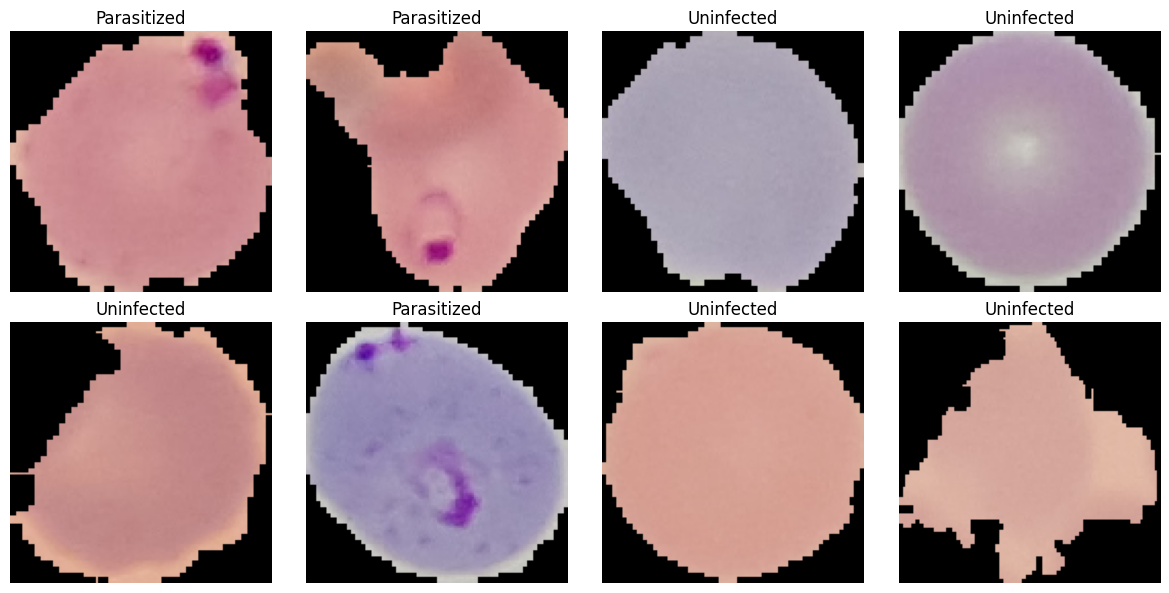

In [5]:
# Retrieving one batch of images and labels from the training generator
images, labels = next(train_generator)

# Plot for the first 8 images from the batch
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i])
    label_text = "Uninfected" if labels[i] == 1 else "Parasitized"    
    plt.title(label_text)
    plt.axis('off')
plt.tight_layout()
plt.show()

## Building and Compiling the CNN Model

Using a dense classifier and three convolutional blocks, we construct a basic CNN architecture.  
- Convolution and MaxPooling layers are included in the model to extract features.
- A Dense layer with Dropout for regularization 
- A Flatten layer to turn the feature maps into a 1D vector
- A sigmoid-activated last dense layer for binary output

In [6]:
# Defining the CNN model architecture
model = tf.keras.models.Sequential([
    # Convolutional Block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Convolutional Block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Convolutional Block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Flatten and Fully Connected Layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the model with binary crossentropy loss and the Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()  # Display the model architecture


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

## Training the Model

train the model using our training and validation generators for 20 epochs.  

In [7]:
EPOCHS = 20

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)


Epoch 1/20
689/689 [==============================] - 882s 1s/step - loss: 0.3635 - accuracy: 0.8394 - val_loss: 0.1799 - val_accuracy: 0.9363
Epoch 2/20
689/689 [==============================] - 543s 789ms/step - loss: 0.1621 - accuracy: 0.9507 - val_loss: 0.1829 - val_accuracy: 0.9350
Epoch 3/20
689/689 [==============================] - 569s 826ms/step - loss: 0.1398 - accuracy: 0.9579 - val_loss: 0.1771 - val_accuracy: 0.9454
Epoch 4/20
689/689 [==============================] - 539s 783ms/step - loss: 0.1272 - accuracy: 0.9619 - val_loss: 0.1432 - val_accuracy: 0.9474
Epoch 5/20
689/689 [==============================] - 518s 752ms/step - loss: 0.1145 - accuracy: 0.9633 - val_loss: 0.1609 - val_accuracy: 0.9461
Epoch 6/20
689/689 [==============================] - 534s 775ms/step - loss: 0.1016 - accuracy: 0.9673 - val_loss: 0.1631 - val_accuracy: 0.9450
Epoch 7/20
689/689 [==============================] - 547s 793ms/step - loss: 0.0954 - accuracy: 0.9679 - val_loss: 0.1798 - va

## Visualizing Training History

To evaluate model performance and potential overfitting, we plot the training and validation accuracy and loss across epochs.


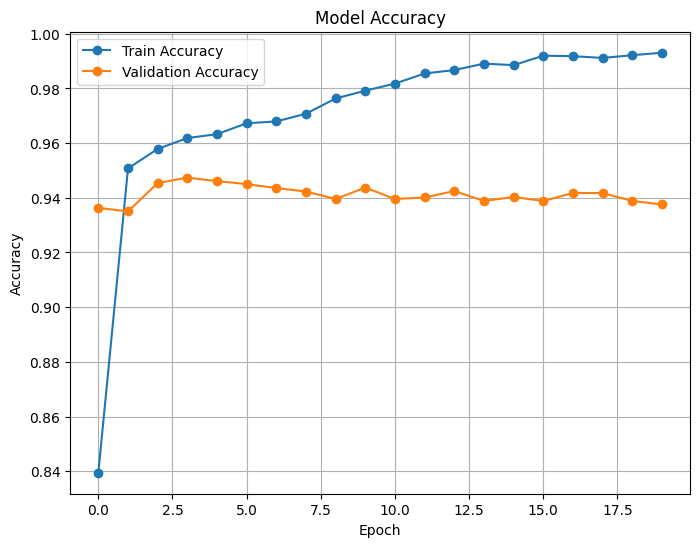

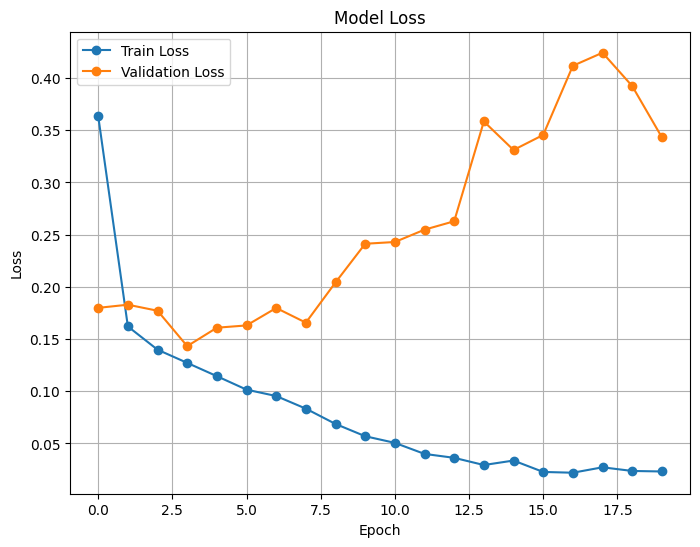

In [8]:
# Plot for the Training and Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], marker='o', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], marker='o', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot for the Training and Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], marker='o', label='Train Loss')
plt.plot(history.history['val_loss'], marker='o', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## Model Evaluation

assessing the model's performance on the validation set, which provides a reliable indicator of the model's ability to generalize to unseen data.

In [9]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


173/173 [==============================] - 42s 243ms/step - loss: 0.3433 - accuracy: 0.9376
Validation Loss: 0.3432842195034027
Validation Accuracy: 0.9375680685043335


173/173 [==============================] - 42s 241ms/step
Classification Report:
               precision    recall  f1-score   support

 Parasitized       0.51      0.49      0.50      2755
  Uninfected       0.51      0.52      0.51      2755

    accuracy                           0.51      5510
   macro avg       0.51      0.51      0.51      5510
weighted avg       0.51      0.51      0.51      5510

Confusion Matrix:
 [[1354 1401]
 [1319 1436]]


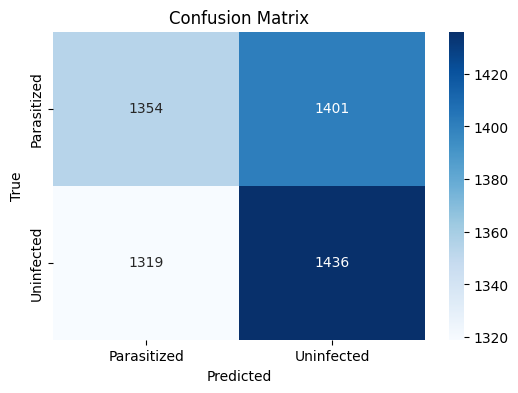

In [10]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Prediction on the validation data
# For a small sample,
predictions = model.predict(validation_generator, verbose=1)
# Since our model outputs probabilities, convert to binary labels (0 or 1)
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Getting the true labels; ensuring that the generator doesn't shuffle for correct order comparison
true_labels = validation_generator.classes

#  classification report
print("Classification Report:\n", classification_report(true_labels, predicted_labels, target_names=['Parasitized', 'Uninfected']))

# confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:\n", cm)

# confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels=['Parasitized', 'Uninfected'],
            yticklabels=['Parasitized', 'Uninfected'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


1/1 [==============================] - 0s 491ms/step


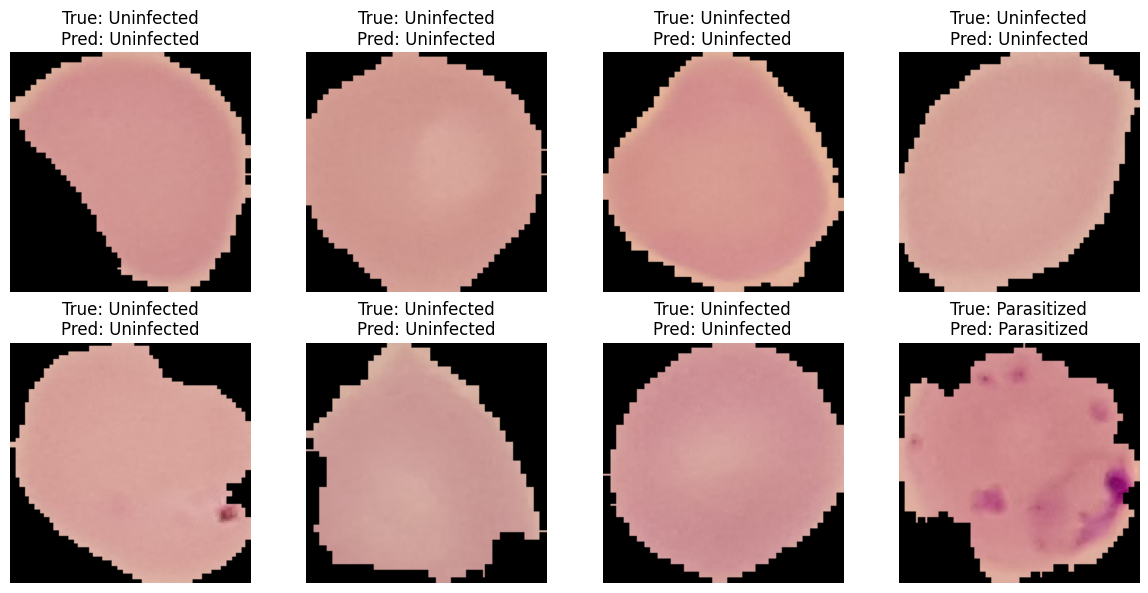

In [11]:
# Getting a batch from the validation generator for visual inspection
images, labels = next(validation_generator)

# predictions on this batch
batch_predictions = model.predict(images)
batch_predicted_labels = (batch_predictions > 0.5).astype(int).flatten()

plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i])
    true_text = "Uninfected" if labels[i] == 1 else "Parasitized"
    pred_text = "Uninfected" if batch_predicted_labels[i] == 1 else "Parasitized"
    plt.title(f"True: {true_text}\nPred: {pred_text}")
    plt.axis('off')
plt.tight_layout()
plt.show()
